In [1]:
from google.colab import files
uploaded = files.upload()


Saving zomato.csv to zomato.csv


In [2]:
import pandas as pd

df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
!pip install seaborn
!pip install plotly

In [4]:
df.drop_duplicates(inplace=True)

df = df.dropna(subset=['rate', 'location', 'cuisines', 'rest_type', 'approx_cost(for two people)'])

# Remove '/5' from rate and convert to float
df['rate'] = df['rate'].apply(lambda x: str(x).split('/')[0].strip() if isinstance(x, str) else x)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

df['cost'] = df['approx_cost(for two people)'].str.replace(',', '')
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

df.dropna(subset=['rate', 'cost'], inplace=True)

<ipython-input-5-cdee540d898f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rest_types.values, y=rest_types.index, palette='viridis')


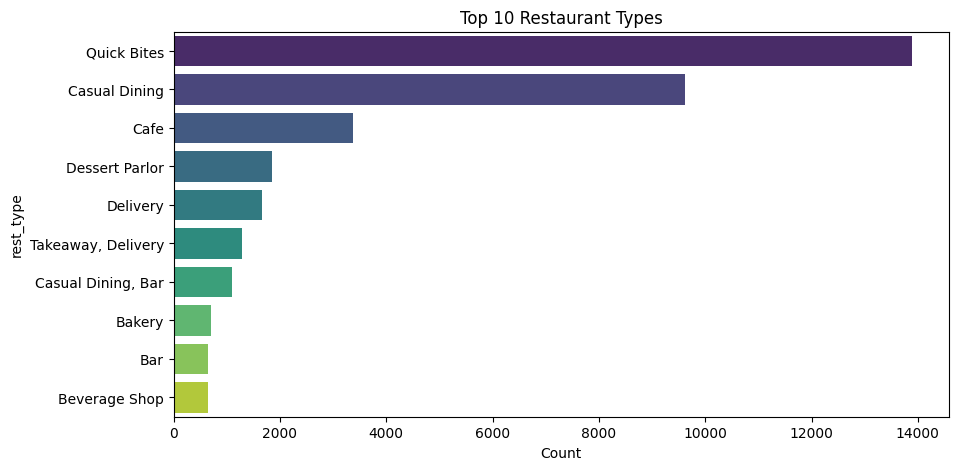

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
rest_types = df['rest_type'].value_counts()[:10]
sns.barplot(x=rest_types.values, y=rest_types.index, palette='viridis')
plt.title('Top 10 Restaurant Types')
plt.xlabel('Count')
plt.show()

<ipython-input-6-1ea571d7fd05>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisines.values, y=cuisines.index, palette='coolwarm')


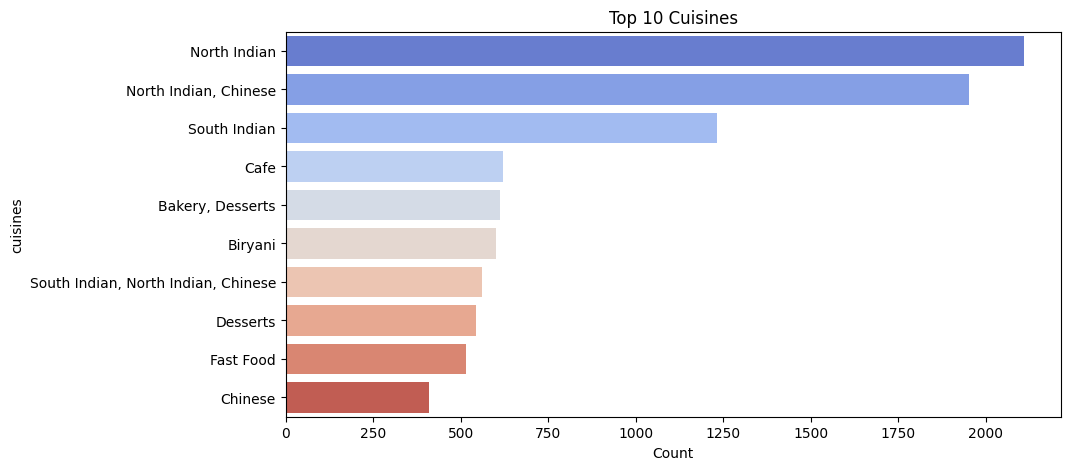

In [6]:
#Most common cusinies
plt.figure(figsize=(10, 5))
cuisines = df['cuisines'].value_counts()[:10]
sns.barplot(x=cuisines.values, y=cuisines.index, palette='coolwarm')
plt.title('Top 10 Cuisines')
plt.xlabel('Count')
plt.show()

<ipython-input-7-a2060a554ef9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='magma')


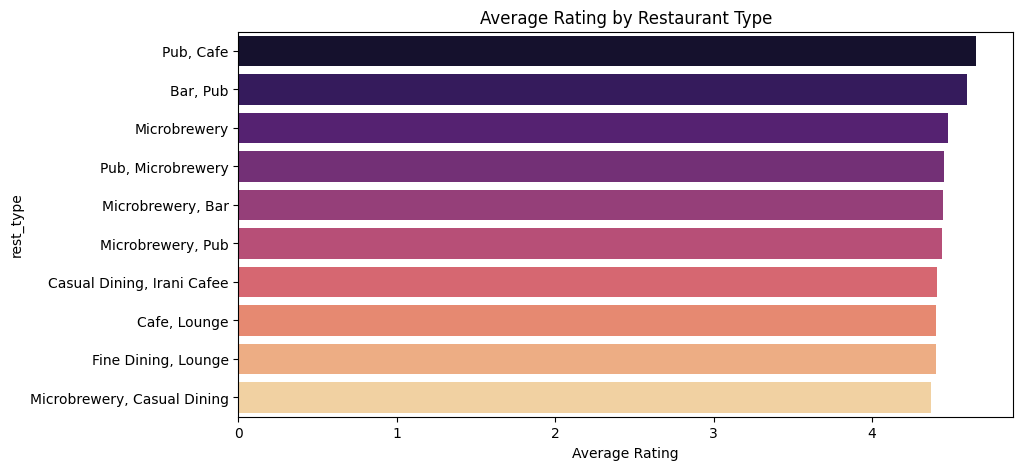

In [7]:
#Average Rating by Restaurant Type
avg_rating = df.groupby('rest_type')['rate'].mean().sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='magma')
plt.title('Average Rating by Restaurant Type')
plt.xlabel('Average Rating')
plt.show()

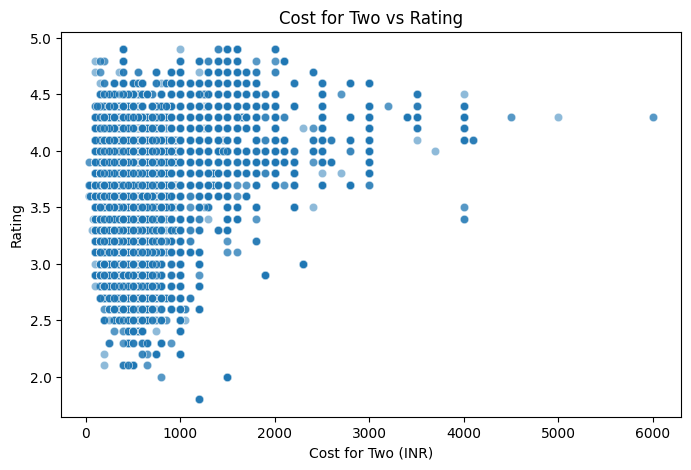

In [8]:
#Cost vs Rating Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='cost', y='rate', data=df, alpha=0.5)
plt.title('Cost for Two vs Rating')
plt.xlabel('Cost for Two (INR)')
plt.ylabel('Rating')
plt.show()

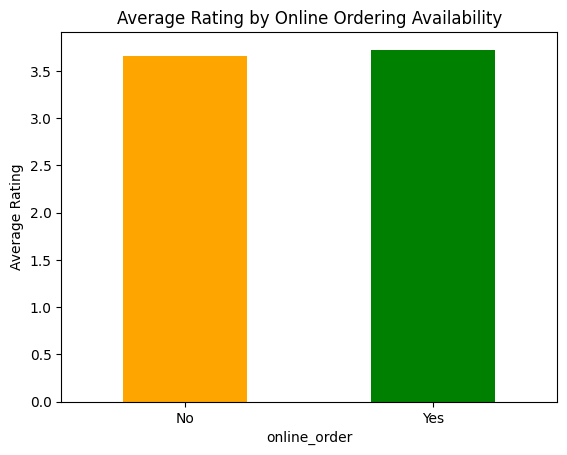

In [9]:
# Online Order vs Rating
online_order_rating = df.groupby('online_order')['rate'].mean()
online_order_rating.plot(kind='bar', color=['orange', 'green'])
plt.title('Average Rating by Online Ordering Availability')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()